# Café Sales Analysis - Exploratory Data Analysis & Business Insights

## Executive Summary
This notebook provides comprehensive exploratory data analysis of café sales data to generate actionable business insights. Through statistical analysis and data visualization, we identify key patterns in customer behavior, revenue trends, and operational opportunities that will inform strategic business decisions.

## Business Intelligence Objectives

1. Create basic summary table
2. Which month has the highest revenue? 
3. Which day has the highest revenue? 
4. Is revenue higher on weekdays or weekends?
5. What are the top selling products?
6. Which products are the most profitable?
7. Do customers buy more “treat” items (like cake or cookies) during busy periods?


## 1. Environment Setup and Data Loading

We import specialized libraries for comprehensive data analysis and visualization.

In [3]:
# Import essential libraries for exploratory data analysis
import pandas as pd              # Data manipulation and analysis
import numpy as np               # Numerical computing and statistical operations
import matplotlib.pyplot as plt  # Static data visualization
import seaborn as sns            # More visualizations


# Configure pandas for better data display
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option('display.float_format', '{:.2f}'.format)  # Clean number formatting

### 1.2 Data Loading

We load the cleaned dataset 

In [4]:
# Load the cleaned café sales dataset
# Note: Adjust file path as needed for your environment
df = pd.read_csv('/Users/kabbo/Desktop/marcy/Project 2 Cafe Sales/M1-FINAL-PROJECT-THIERNO_KABBO/data/cleaned/cleaned_cafe_sales.csv')


## 2. Descriptive Analytics Foundation


**Purpose**: Establish baseline understanding of data distributions and business performance metrics.

In [6]:
# Comprehensive descriptive statistics analysis
print("Numerical Values Summary")
numerical_summary = df.describe()
print(numerical_summary)

print("\nCategorical Variables Summary")
categorical_summary = df.describe(include='object')
print(categorical_summary)

# Display sample of clean data
print("\nSample Data Preview")
print(df.head())



Numerical Values Summary
       Quantity  Price Per Unit  Total Spent
count   9540.00         9540.00      9540.00
mean       3.02            2.95         8.93
std        1.38            1.24         5.82
min        1.00            1.00         1.00
25%        2.00            2.00         4.00
50%        3.00            3.00         8.00
75%        4.00            4.00        12.00
max        5.00            5.00        25.00

Categorical Variables Summary
       Transaction ID   Item  Payment Method  Location Transaction Date
count            9540   9540            6525      5761             9540
unique           9540      9               3         2              365
top       TXN_1961373  Juice  Digital Wallet  Takeaway       2023-02-06
freq                1   1124            2197      2889               40

Sample Data Preview
  Transaction ID    Item  Quantity  Price Per Unit  Total Spent  \
0    TXN_1961373  Coffee         2            2.00         4.00   
1    TXN_4977031    Cake

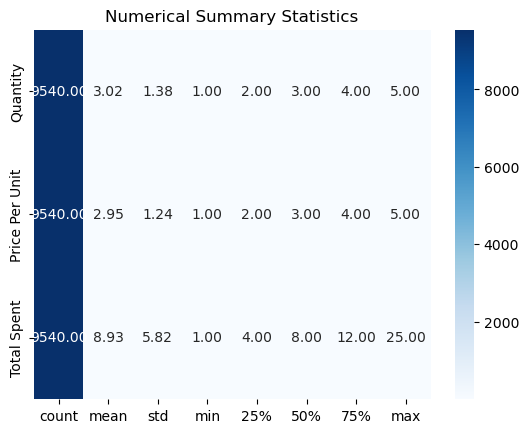

In [10]:
# Heatmap of summary statistics
summary = df.describe().T  # Transpose for better heatmap display
sns.heatmap(summary, annot=True, fmt=".2f", cmap="Blues")
plt.title('Numerical Summary Statistics')
plt.show()

## 3. Monthly Revenue Performance Analysis

**Business Question**: Which month generates the highest revenue?

**Analytical Approach**: We analyze monthly revenue patterns to identify seasonal trends that can inform:
- Marketing campaign timing
- Inventory planning
- Staffing optimization
- Promotional strategy development

In [ ]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

# Extract time components
df['month'] = df['Transaction Date'].dt.month

# Monthly sales trends
monthly_sales = df.groupby('month')['Total Spent'].agg('sum').reset_index()
monthly_sales.columns = ['month', 'Total Spent']

monthly_sales_sorted = monthly_sales.sort_values('Total Spent', ascending=False)
print(monthly_sales_sorted)

    month  Total Spent
5       6      7411.15
9      10      7345.30
0       1      7251.00
11     12      7213.15
2       3      7208.15
3       4      7188.95
7       8      7095.10
10     11      7014.70
4       5      6971.40
6       7      6921.60
8       9      6880.15
1       2      6667.20


/var/folders/78/8f22v_ln4kvg9b_7fr3_2nfh0000gn/T/ipykernel_48613/1096107493.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales_sorted, x='month', y='Total Spent', palette='viridis')


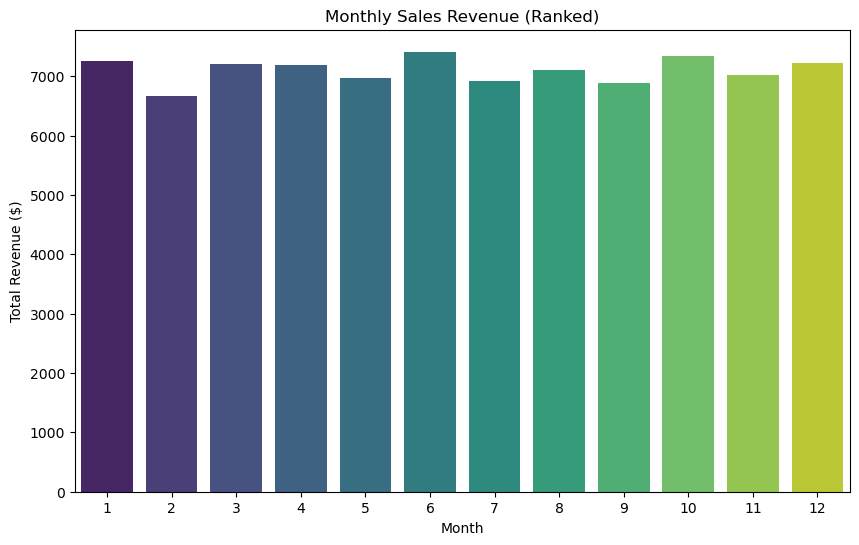

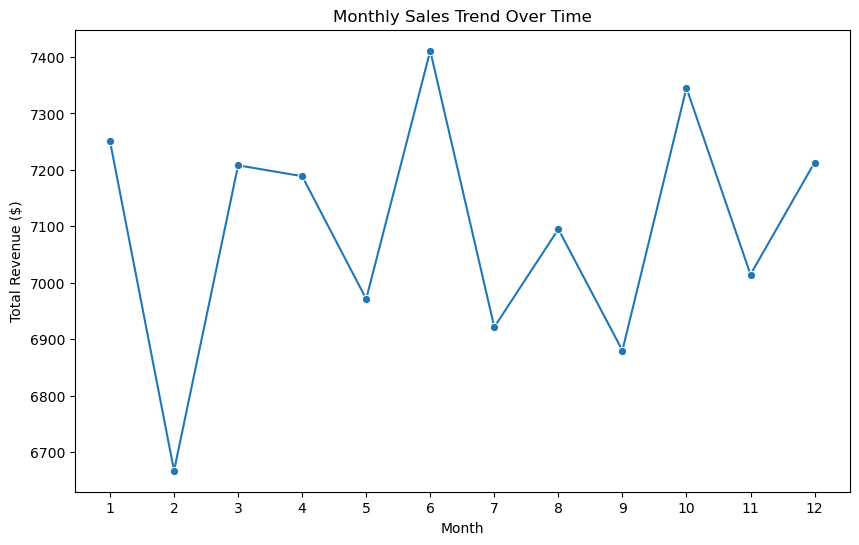

In [13]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df['month'] = df['Transaction Date'].dt.month

# Monthly sales trends
monthly_sales = df.groupby('month')['Total Spent'].sum().reset_index()

# Sort for better visualization
monthly_sales_sorted = monthly_sales.sort_values('Total Spent', ascending=False)

# Bar plot - sorted by revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_sales_sorted, x='month', y='Total Spent', palette='viridis')
plt.title('Monthly Sales Revenue (Ranked)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.show()

# Line plot - chronological trend
plt.figure(figsize=(10, 6))
monthly_sales_chrono = monthly_sales.sort_values('month')
sns.lineplot(data=monthly_sales_chrono, x='month', y='Total Spent', marker='o')
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(range(1, 13))
plt.show()

#print(monthly_sales_sorted)

### 3.2 Daily Revenue Performance Analysis

**Business Question**: Which day of the week drives maximum revenue?

**Strategic Value**: Understanding daily patterns enables:
- Optimal staff scheduling
- Day-specific promotional strategies
- Inventory management optimization
- Operational cost management

In [ ]:

df['day_of_week'] = df['Transaction Date'].dt.day_name()

# Daily sales trends
daily_sales = df.groupby('day_of_week')['Total Spent'].agg('sum').reset_index()
daily_sales.columns = ['day_of_week', 'Total Spent']

#print(daily_sales)
daily_sales_sorted = daily_sales.sort_values('Total Spent', ascending=False)
#print(daily_sales)
print(daily_sales_sorted)

  day_of_week  Total Spent
3      Sunday     12420.65
4    Thursday     12382.65
0      Friday     12335.65
1      Monday     12192.90
5     Tuesday     12031.35
2    Saturday     12029.80
6   Wednesday     11774.85


/var/folders/78/8f22v_ln4kvg9b_7fr3_2nfh0000gn/T/ipykernel_48613/3566610525.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_sales, x='day_of_week', y='Total Spent', palette='crest')


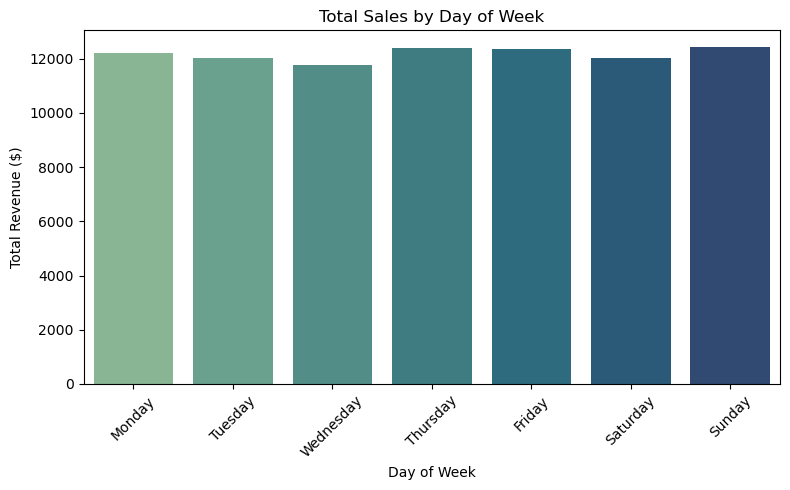

In [14]:
# Extract day of week
df['day_of_week'] = df['Transaction Date'].dt.day_name()

# Aggregate daily sales
daily_sales = df.groupby('day_of_week')['Total Spent'].sum().reset_index()

# To ensure days are in calendar order, define the order explicitly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales['day_of_week'] = pd.Categorical(daily_sales['day_of_week'], categories=days_order, ordered=True)
daily_sales = daily_sales.sort_values('day_of_week')

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=daily_sales, x='day_of_week', y='Total Spent', palette='crest')
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3.3 Weekend vs Weekday Performance Comparison

**Business Question**: Do weekends outperform weekdays in revenue generation?

**Strategic Importance**: This analysis informs:
- Weekend staffing strategies
- Promotional timing decisions
- Customer behavior understanding
- Revenue forecasting models

In [34]:
#df['day_of_week'] = df['Transaction Date'].dt.day_name()
df['day_number'] = df['Transaction Date'].dt.dayofweek  # 0=Monday, 6=Sunday


# Create weekend flag (Saturday=5, Sunday=6)
df['is_weekend'] = df['day_number'].isin([5, 6])

# Group by weekend vs weekday
weekend_comparison = df.groupby('is_weekend').agg(
    transaction_count=('Transaction ID', 'count'),
    total_revenue=('Total Spent', 'sum'),
    avg_transaction_value=('Total Spent', 'mean')
).reset_index()

print("Weekend vs Weekday Comparison:")
print(weekend_comparison)

Weekend vs Weekday Comparison:
   is_weekend  transaction_count  total_revenue  avg_transaction_value
0       False               6802       60717.38                   8.93
1        True               2738       24450.44                   8.93


/var/folders/78/8f22v_ln4kvg9b_7fr3_2nfh0000gn/T/ipykernel_48613/413576231.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekend_comparison, x='day_type', y='transaction_count', ax=axes[0], palette='Set2')
/var/folders/78/8f22v_ln4kvg9b_7fr3_2nfh0000gn/T/ipykernel_48613/413576231.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekend_comparison, x='day_type', y='total_revenue', ax=axes[1], palette='Set2')
/var/folders/78/8f22v_ln4kvg9b_7fr3_2nfh0000gn/T/ipykernel_48613/413576231.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

 

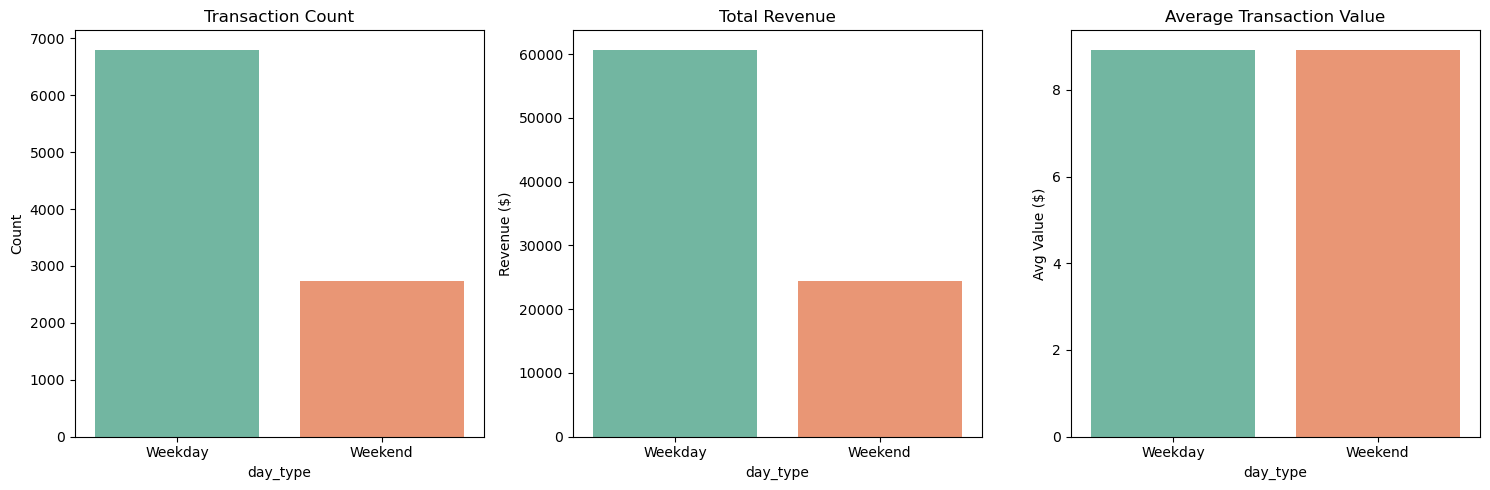

In [16]:
df['day_number'] = df['Transaction Date'].dt.dayofweek
df['is_weekend'] = df['day_number'].isin([5, 6])

# Group by weekend vs weekday
weekend_comparison = df.groupby('is_weekend').agg(
    transaction_count=('Transaction ID', 'count'),
    total_revenue=('Total Spent', 'sum'),
    avg_transaction_value=('Total Spent', 'mean')
).reset_index()

# Add readable labels
weekend_comparison['day_type'] = weekend_comparison['is_weekend'].map({True: 'Weekend', False: 'Weekday'})

# Create subplots for multiple metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Transaction count
sns.barplot(data=weekend_comparison, x='day_type', y='transaction_count', ax=axes[0], palette='Set2')
axes[0].set_title('Transaction Count')
axes[0].set_ylabel('Count')

# Total revenue
sns.barplot(data=weekend_comparison, x='day_type', y='total_revenue', ax=axes[1], palette='Set2')
axes[1].set_title('Total Revenue')
axes[1].set_ylabel('Revenue ($)')

# Average transaction value
sns.barplot(data=weekend_comparison, x='day_type', y='avg_transaction_value', ax=axes[2], palette='Set2')
axes[2].set_title('Average Transaction Value')
axes[2].set_ylabel('Avg Value ($)')

plt.tight_layout()
plt.show()


## 4. Product Performance Analysis

### 4.1 Top-Selling Products by Volume

**Business Question**: What are the top-selling products by quantity?

**Strategic Value**: Volume analysis reveals:
- Customer preferences and demand patterns
- Inventory planning requirements
- Supply chain optimization opportunities
- Popular items for promotional focus

In [ ]:

top_products = df.groupby('Item')['Quantity'].sum().sort_values(ascending=False).reset_index()

print(top_products.head(10)) 



       Item  Quantity
0    Coffee      3425
1     Juice      3351
2     Salad      3314
3      Cake      3278
4  Sandwich      3266
5  Smoothie      3208
6       Tea      3125
7    Cookie      3093
8   UNKNOWN      2790


/var/folders/78/8f22v_ln4kvg9b_7fr3_2nfh0000gn/T/ipykernel_48613/2387288082.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products.head(10), x='Quantity', y='Item', palette='viridis')


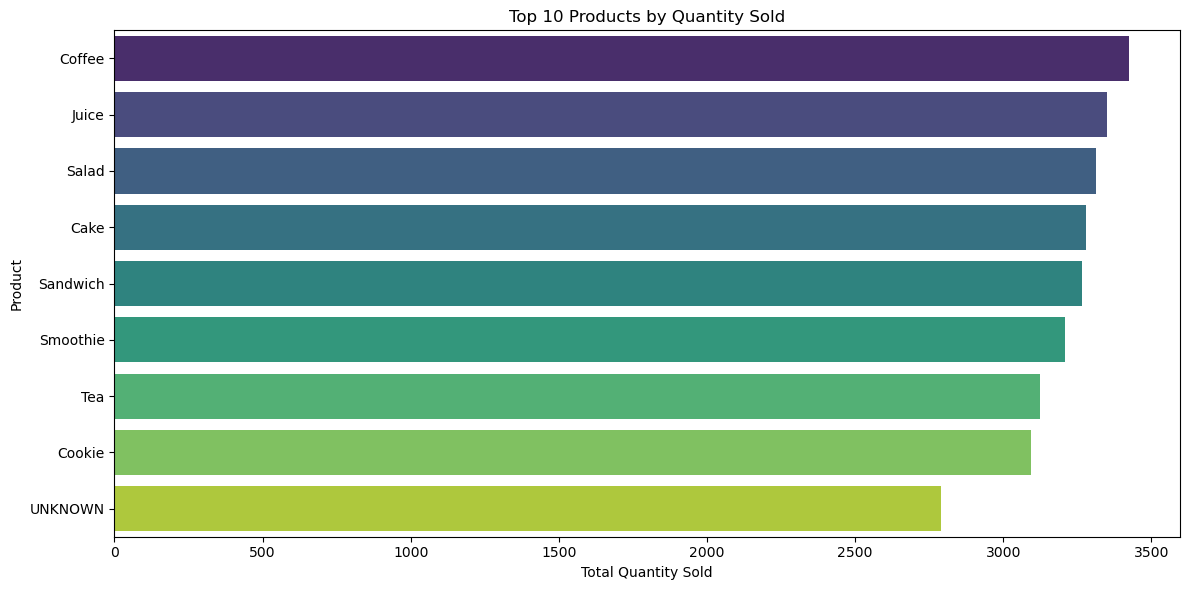

In [17]:
# Get top products
top_products = df.groupby('Item')['Quantity'].sum().sort_values(ascending=False).reset_index()

# Visualize top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products.head(10), x='Quantity', y='Item', palette='viridis')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

### 4.2 Most Profitable Products Analysis

**Business Question**: Which products generate the most revenue?

**Strategic Importance**: Revenue analysis identifies:
- Profit-driving products for business focus
- High-value items for premium positioning
- Revenue optimization opportunities
- Product mix strategy guidance

In [18]:
df['item_revenue'] = df['Quantity'] * df['Price Per Unit']
top_products_by_revenue = df.groupby('Item')['item_revenue'].sum().sort_values(ascending=False).reset_index()
print(top_products_by_revenue.head(10))

       Item  item_revenue
0     Salad      16188.70
1  Sandwich      12883.40
2  Smoothie      12633.55
3     Juice      10044.00
4      Cake       9826.55
5   UNKNOWN       8187.35
6    Coffee       6991.55
7       Tea       4974.60
8    Cookie       3438.15


/var/folders/78/8f22v_ln4kvg9b_7fr3_2nfh0000gn/T/ipykernel_48613/3724577019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products_by_revenue.head(10), x='item_revenue', y='Item', palette='plasma')


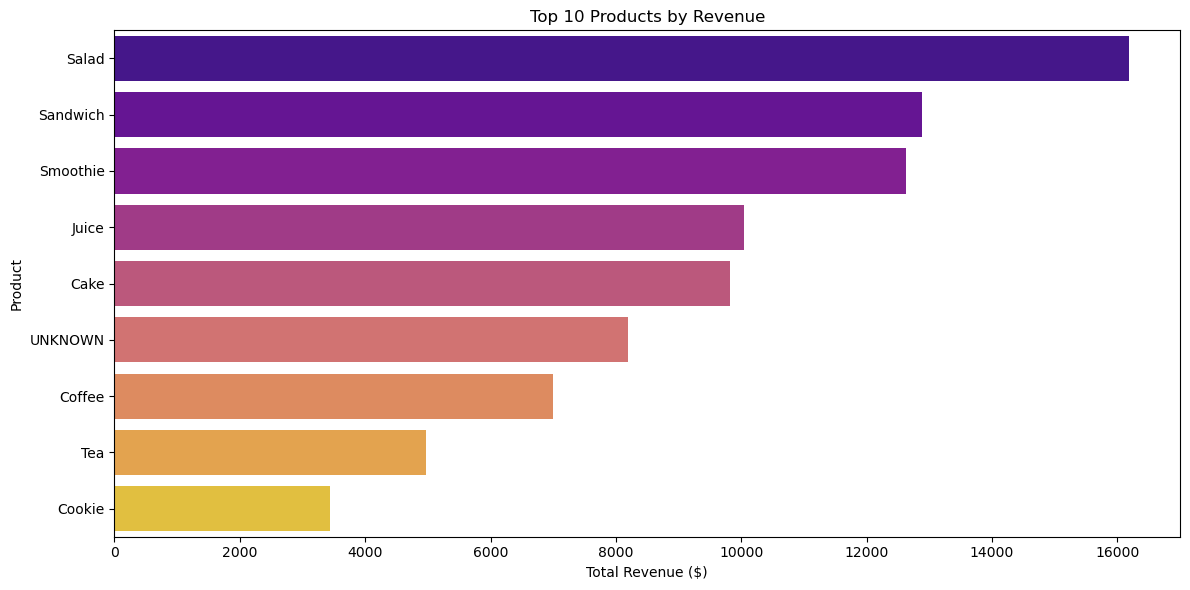

In [19]:
# Calculate item revenue and get top products
df['item_revenue'] = df['Quantity'] * df['Price Per Unit']
top_products_by_revenue = df.groupby('Item')['item_revenue'].sum().sort_values(ascending=False).reset_index()

# Horizontal bar chart for top 10 products by revenue
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products_by_revenue.head(10), x='item_revenue', y='Item', palette='plasma')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

## 5. Customer Behavior Analysis

**Business Question**: Do customers buy more "treat" items (cake, cookies) during busy periods?

**Business Value**: Understanding treat purchasing patterns enables:
- Targeted promotional strategies
- Inventory optimization for peak periods
- Customer experience enhancement
- Revenue maximization through strategic product placement

In [38]:
treat_items = ['Cake', 'Cookie']
df['is_treat'] = df['Item'].isin(treat_items)

# Total treat items sold on weekdays and weekends
treat_sales = df[df['is_treat']].groupby(df['is_weekend'])['Quantity'].sum()

# Total transactions on weekdays and weekends
transactions = df.groupby('is_weekend')['Transaction ID'].count()

# Proportion of treat items per transaction
treat_per_transaction = treat_sales / transactions

print("Treat items sold (weekdays):", treat_sales.get(False, 0))
print("Treat items sold (weekends):", treat_sales.get(True, 0))
print("Treat items per transaction (weekdays):", treat_per_transaction.get(False, 0))
print("Treat items per transaction (weekends):", treat_per_transaction.get(True, 0))

Treat items sold (weekdays): 4553
Treat items sold (weekends): 1818
Treat items per transaction (weekdays): 0.669361952366951
Treat items per transaction (weekends): 0.6639883126369612


/var/folders/78/8f22v_ln4kvg9b_7fr3_2nfh0000gn/T/ipykernel_48613/3770982553.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='Day Type', y='Treat Items Sold', palette='pastel')


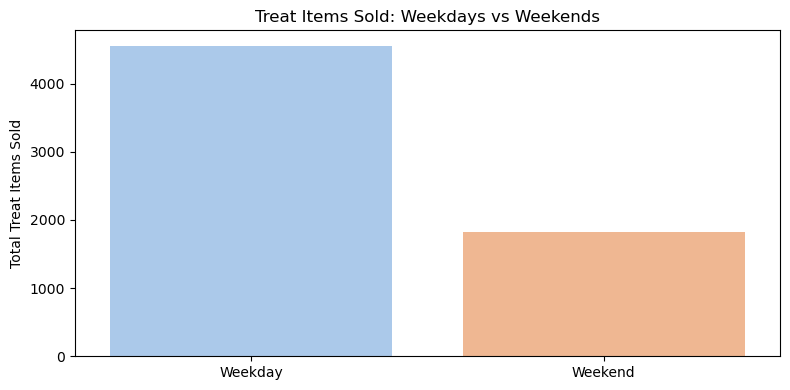

/var/folders/78/8f22v_ln4kvg9b_7fr3_2nfh0000gn/T/ipykernel_48613/3770982553.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='Day Type', y='Treats per Transaction', palette='pastel')


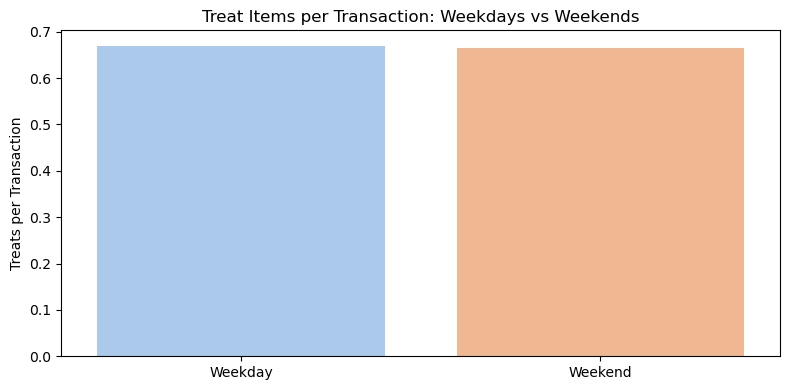

In [20]:
treat_items = ['Cake', 'Cookie']
df['is_treat'] = df['Item'].isin(treat_items)

# Total treat items sold on weekdays and weekends
treat_sales = df[df['is_treat']].groupby(df['is_weekend'])['Quantity'].sum()

# Total transactions on weekdays and weekends
transactions = df.groupby('is_weekend')['Transaction ID'].count()

# Proportion of treat items per transaction
treat_per_transaction = treat_sales / transactions

# Prepare DataFrame for plotting
summary = pd.DataFrame({
    'Treat Items Sold': treat_sales,
    'Treats per Transaction': treat_per_transaction
}).reset_index()
summary['Day Type'] = summary['is_weekend'].map({False: 'Weekday', True: 'Weekend'})

# Plot: Treat items sold
plt.figure(figsize=(8, 4))
sns.barplot(data=summary, x='Day Type', y='Treat Items Sold', palette='pastel')
plt.title('Treat Items Sold: Weekdays vs Weekends')
plt.ylabel('Total Treat Items Sold')
plt.xlabel('')
plt.tight_layout()
plt.show()

# Plot: Treat items per transaction
plt.figure(figsize=(8, 4))
sns.barplot(data=summary, x='Day Type', y='Treats per Transaction', palette='pastel')
plt.title('Treat Items per Transaction: Weekdays vs Weekends')
plt.ylabel('Treats per Transaction')
plt.xlabel('')
plt.tight_layout()
plt.show()